In [279]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix ,classification_report,accuracy_score,balanced_accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.semi_supervised import SelfTrainingClassifier

In [280]:
df=pd.read_csv(r"C:\Users\navde\Desktop\data.csv")

In [192]:
df.head()

,Cancer stage,Clump thickness,No of week,Clump thickness_new,No of week_new,True cancer stage
0,1.0,10.510076,6.166544,10.269649,11.999203,1
1,1.0,11.739776,7.024066,10.494287,6.495638,1
2,1.0,7.857070,5.909366,8.516879,7.102108,1
3,1.0,10.817929,5.920890,8.979736,9.196251,1
4,1.0,10.302407,6.984937,9.553005,7.120283,1


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cancer stage         200 non-null    float64
 1   Clump thickness      200 non-null    float64
 2   No of week           200 non-null    float64
 3   Clump thickness_new  2000 non-null   float64
 4   No of week_new       2000 non-null   float64
 5   True cancer stage    2000 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 93.9 KB


In [194]:
df.describe()

,Cancer stage,Clump thickness,No of week,Clump thickness_new,No of week_new,True cancer stage
count,200.00000,200.000000,200.000000,2000.000000,2000.000000,2000.000000
mean,2.50000,8.241801,8.207201,7.998163,8.317333,2.500000
std,1.12084,3.663026,3.824028,3.378117,3.878011,1.118314
min,1.00000,1.766717,0.641304,0.136884,-1.799827,1.000000
25%,1.75000,4.882482,5.141287,5.166022,5.722102,1.750000
50%,2.50000,7.643025,9.198574,8.408072,8.165913,2.500000
75%,3.25000,11.645020,11.432148,10.818985,11.519238,3.250000
max,4.00000,15.056272,14.877980,16.372177,16.765200,4.000000


Text(0, 0.5, 'No of Week')

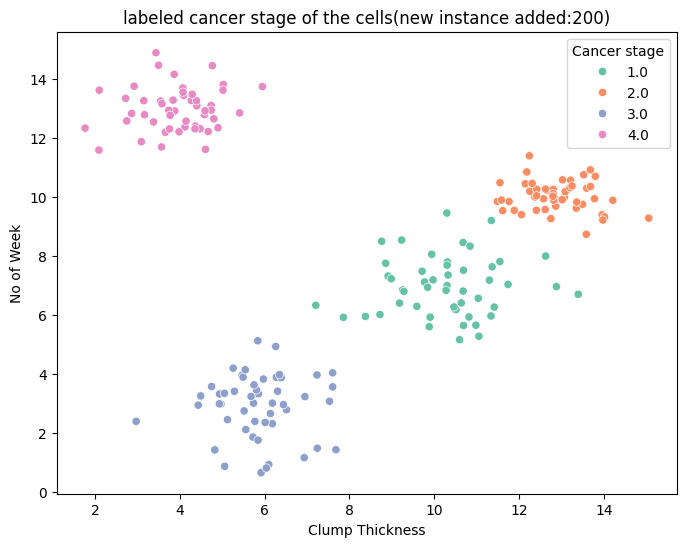

In [195]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Clump thickness',y='No of week',data=df,hue='Cancer stage',palette="Set2")
plt.title('labeled cancer stage of the cells(new instance added:200)')
plt.xlabel('Clump Thickness')
plt.ylabel('No of Week')


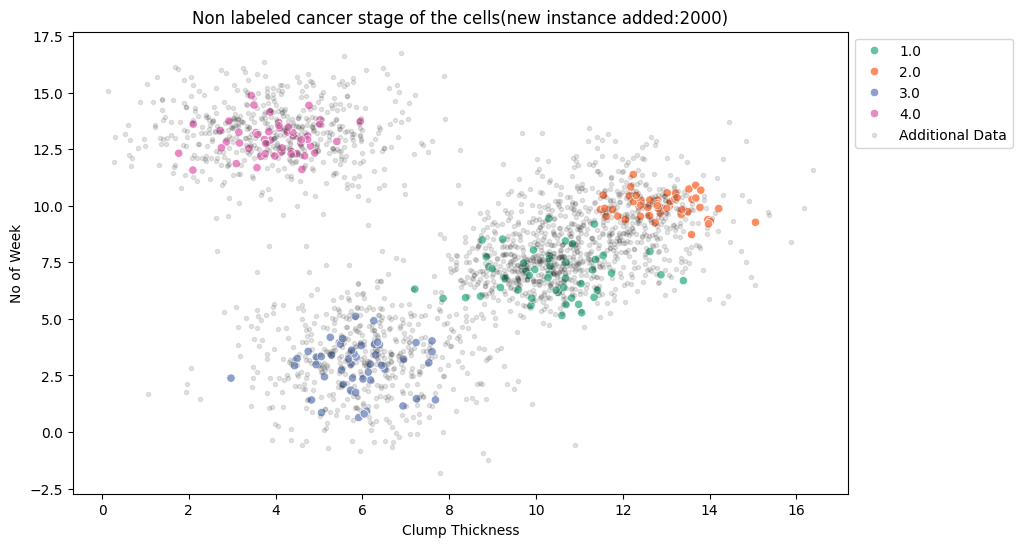

In [196]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Clump thickness',y='No of week',data=df,hue='Cancer stage',palette="Set2")
plt.scatter(df['Clump thickness_new'], df['No of week_new'], label='Additional Data',color="black", alpha=0.1,marker='.')
# Customize the plot
plt.title('Non labeled cancer stage of the cells(new instance added:2000)')
plt.xlabel('Clump Thickness')
plt.ylabel('No of Week')

# Add legend for the additional data
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [316]:
df1 = df.loc[:199, ['Cancer stage', 'Clump thickness', 'No of week']]
df2 = df.loc[:, ['Clump thickness_new', 'No of week_new', 'True cancer stage']]
df2.rename(columns={'Clump thickness_new': 'Clump thickness', 'No of week_new': 'No of week', 'True cancer stage':'Cancer stage'}, inplace=True)

In [319]:
feature = df1[['Clump thickness', 'No of week']]
target = df1['Cancer stage']

feature_new = df2[['Clump thickness', 'No of week']]
target_new = df2['Cancer stage'] 

k_values = np.arange(1, 199)
val_scores = {}
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(feature, target)
    val_score = knn.score(feature_new, target_new)
    val_scores[k] = val_score

optimak_k = max(val_scores, key=val_scores.get)
print(f"Best K value: {optimak_k}")

Best K value: 93


C:\Users\navde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\semi_supervised\_self_training.py:214: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)


<Axes: >

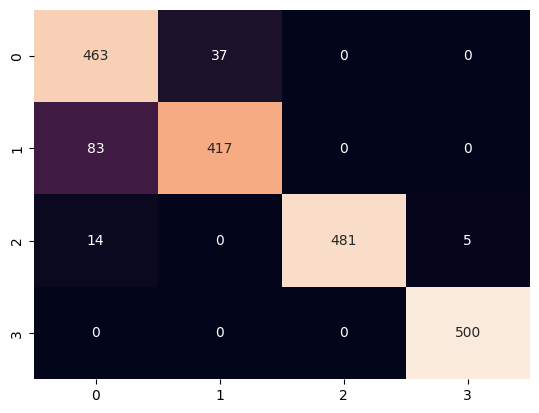

In [322]:
knn1 = KNeighborsClassifier(n_neighbors =93)
knn1.fit(feature, target)
model = SelfTrainingClassifier(knn1)
model.fit(feature, target)
y_predicted = model.predict(feature_new)
cm = confusion_matrix(target_new, y_predicted)
ac = accuracy_score(target_new, y_predicted)
clf = classification_report(target_new, y_predicted)
sns.heatmap(cm, annot=True, fmt='d', cbar=False)

In [331]:
true_labels = df['True cancer stage'].dropna()

accuracy = accuracy_score(true_labels, y_predicted)
print(f'Accuracy Score: {accuracy}')

print('Classification Report:')
print(classification_report(true_labels, y_predicted))

Accuracy Score: 0.9305
Classification Report:
              precision    recall  f1-score   support

           1       0.83      0.93      0.87       500
           2       0.92      0.83      0.87       500
           3       1.00      0.96      0.98       500
           4       0.99      1.00      1.00       500

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


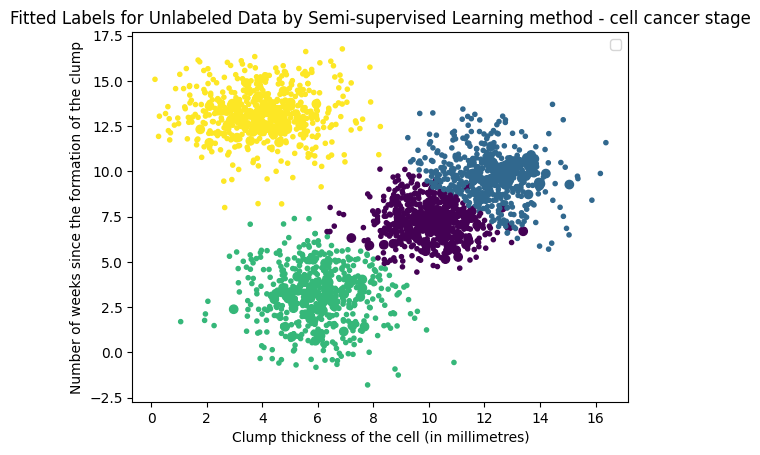

In [330]:
# Scatter plot for the labeled and unlabeled data with predicted labels for the unlabeled data points
plt.scatter(feature['Clump thickness'], feature['No of week'], c=target)
plt.scatter(feature_new['Clump thickness'], feature_new['No of week'], marker='.', c=y_predicted)
plt.title('Fitted Labels for Unlabeled Data by Semi-supervised Learning method - cell cancer stage')
plt.xlabel('Clump thickness of the cell (in millimetres)')
plt.ylabel('Number of weeks since the formation of the clump')
plt.legend()
plt.show()